<center><span style="font-size:25px;">КЛАССИФИКАЦИЯ ЛЮДЕЙ НА МУЖЧИН И ЖЕНЩИН ПО ГОЛОСУ</span></center>

<img src='data/pics/descr1.png' width='70%' style='display:block; margin:auto;' />
<br />
<img src='data/pics/descr2.png' width='70%' style='display:block; margin:auto;' />

Проект был сделан на `Python 3.11.6`

<h2 id='contents'>Оглавляшка:</h2>

<span style="font-size:25px;">Деревья решений: практика</span>

* [Загружаемые библиотеки](#libs)
* [Подгрузка, закомство, делилка](#introload)
* [Обучение DecisionTreeClassifier с параметрами `criterion='entropy'`, `max_depth=1`](#ex_7_1)
* [Обучение DecisionTreeClassifier с параметрами `criterion='entropy'`, `max_depth=2`](#ex_7_2)
* [Обучение DecisionTreeClassifier с параметрами `criterion='entropy'`, `random_state=0`](#ex_7_3) shannon entropy, random_state=0
* [Обучение DecisionTreeClassifier через GridSearchCV](#ex_7_4)

Оригинальную страницу датасета на Kaggle с подробным описанием задачи вы можете найти [здесь](https://www.kaggle.com/datasets/primaryobjects/voicegender).  
Файл с данными, представленными в формате CSV, вы можете скачать [здесь](https://lms-cdn.skillfactory.ru/assets/courseware/v1/0446d35f217801309147def00a120238/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/voice_gender.zip).

Проект сделан на `Python 3.11.6`

## Загружаемые библиотеки <a id='libs'></a>

In [1]:
from data.functions_akialema import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

## Подгрузка, закомство, делилка. <a id='introload'></a>

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1-FvkSsk0_-K5JxoC2YijkThqXsP756r_')

my_info(df)

memory usage: 703.4 KB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,label,2,object,female,3168,0,2,see type column
1,mindom,77,float64,0.02,3168,0,2,min...: 0.00max..: 0.46mean: 0.05std....: 0.06
2,maxfun,123,float64,0.28,3168,0,2,min...: 0.10max..: 0.28mean: 0.26std....: 0.03
3,minfun,913,float64,0.05,3168,0,2,min...: 0.01max..: 0.20mean: 0.04std....: 0.02
4,maxdom,1054,float64,0.01,3168,0,2,min...: 0.01max..: 21.87mean: 5.05std....: 3.52
5,dfrange,1091,float64,0.0,3168,0,2,min...: 0.00max..: 21.84mean: 4.99std....: 3.52
6,mode,2825,float64,0.0,3168,0,2,min...: 0.00max..: 0.28mean: 0.17std....: 0.08
7,meandom,2999,float64,0.01,3168,0,2,min...: 0.01max..: 2.96mean: 0.83std....: 0.53
8,Q75,3034,float64,0.24,3168,0,2,min...: 0.04max..: 0.27mean: 0.22std....: 0.02
9,IQR,3068,float64,0.04,3168,0,2,min...: 0.01max..: 0.25mean: 0.08std....: 0.04


В данных 2 дубликата,  
Самый необычный столбец - `kurt`.)  
Данные в целом выглядят не плохо, все признаки представлены в числовом формате. Таргет представлен в формате `str`.

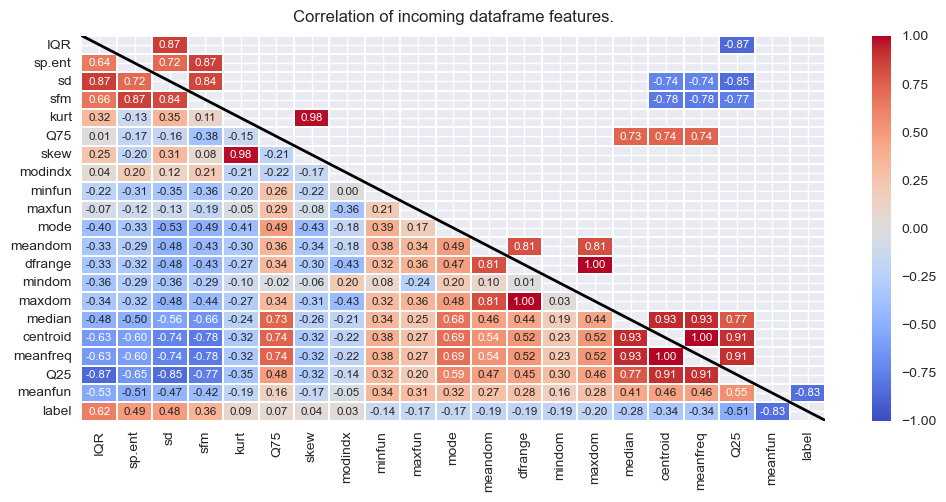

In [3]:
my_corr(df.assign(label=df['label'].apply(lambda x: 1 if x == 'male' else 0)), targ_col='label', corrneg=-0.7, corrpos=0.7, figsize=(12,5), annot_kws={'size': 'small'}).show()

Вангую, что самыми сильными признаками для модели будут `meanfun` и `IQR`.)  
Сильной корреляции много, но мы же строим деревья и в принципе график корреляций - лишний, но он мне нравится.)

Далее разобью данные на `train` и `test` в пропорции 20х80. 

Баланс классов:
male      1584
female    1584
Name: count, dtype: int64

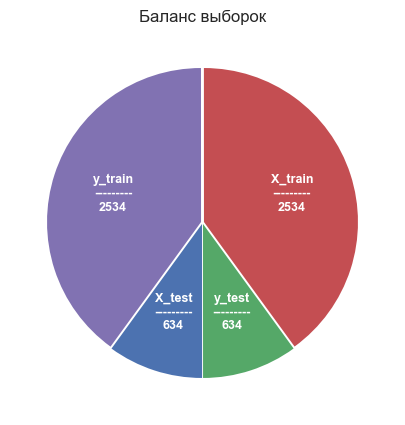

In [4]:
X = df.drop('label', axis=1)
y = df['label']

# стратификация исключительно для совпадения ответов, т.к. классы таргета сбалансированы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
display(y.rename('Баланс классов:').value_counts())

plot_train_test_split_balance(X_train, X_test, y_train, y_test, startangle=234).show()

[↑ contents](#contents)

## Обучение <span style='color:lightgreen'>DecisionTreeClassifier</span> с параметрами: <a id='ex_7_1'></a> 
<span style='color:orange'>criterion</span>=<span style='color:yellow'>'entropy'</span>, <span style='color:orange'>max_depth</span>=<span style='color:blue'>1</span>

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.
1. На основе какого фактора будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.
4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

1. meanfun <- название признака корневой вершины
2. 0.142 <- пороговое значение для этого признака
3. 51.1 <- процентов наблюдений, для которых выполняется заданное в корневой вершине условие
4. 0.956 <- accuracy на тестовой выборке


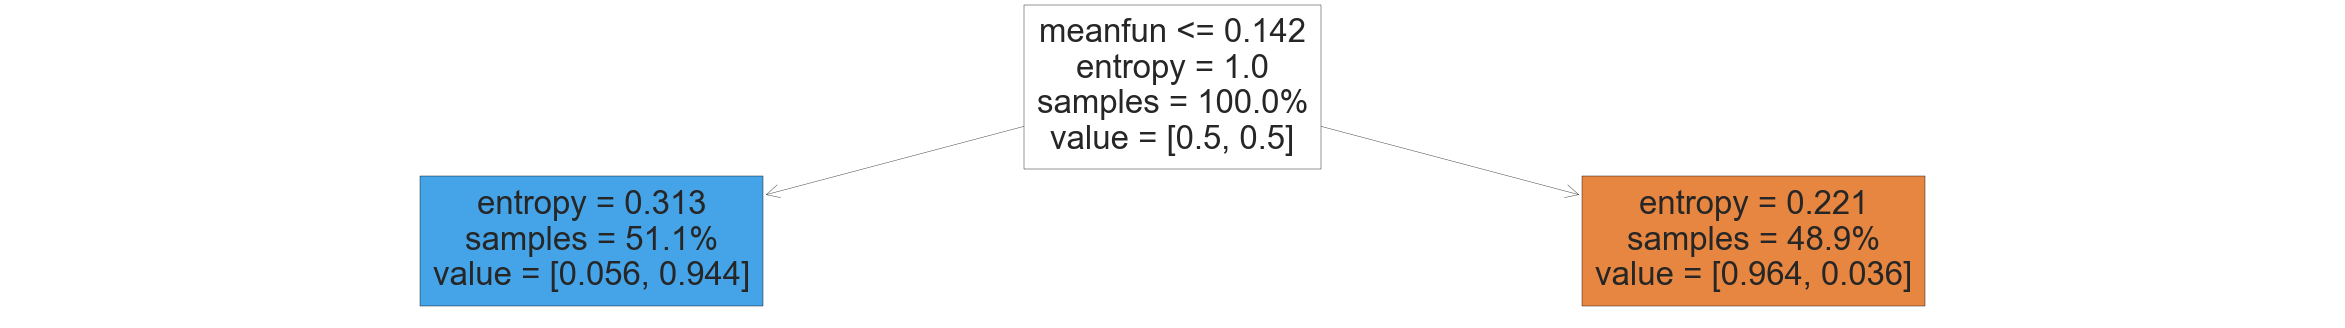

In [5]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(30, 4))
ax = plot_tree(dt, feature_names=list(X_train.columns), filled=True, impurity=True, proportion=True)

print(f"1. {X.columns[dt.tree_.feature[0]]} <- название признака корневой вершины")
print(f"2. {round(dt.tree_.threshold[0], 3)} <- пороговое значение для этого признака")
print(f"3. {round((dt.tree_.n_node_samples[1] / dt.tree_.n_node_samples[0]) * 100, 1)} <- процентов наблюдений, для которых выполняется заданное в корневой вершине условие")
print(f"4. {round(accuracy_score(y_test, dt.predict(X_test)), 3)} <- accuracy на тестовой выборке")

plt.show()

[↑ contents](#contents)

## Обучение <span style='color:lightgreen'>DecisionTreeClassifier</span> с параметрами: <a id='ex_7_2'></a> 
<span style='color:orange'>criterion</span>=<span style='color:yellow'>'entropy'</span>, <span style='color:orange'>max_depth</span>=<span style='color:blue'>2</span>

Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:
2. Сколько листьев в построенном дереве содержат в качестве предсказания класс `female`? Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции `plot_tree()`, укажите параметр `class_names=dt.classes_`.
3. Сделайте предсказание и рассчитайте значение метрики `accuracy` на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

1. ['meanfun', 'IQR', 'Q25'] <- признаки, которые используются при построении дерева
2. [2 3 5 6] <-- номера листьев
   [0 1 0 0] <-- предсказанные классы
   {0: 3, 1: 1} <-- словарь с подсчётом количества листьев определённого класса
   {0: 'female', 1: 'male'} <-- словарь с классами y_train

   {'female': 3, 'male': 1} <-- итоговый словарь для ответа на п.2

3. 0.962 <- accuracy на тестовой выборке


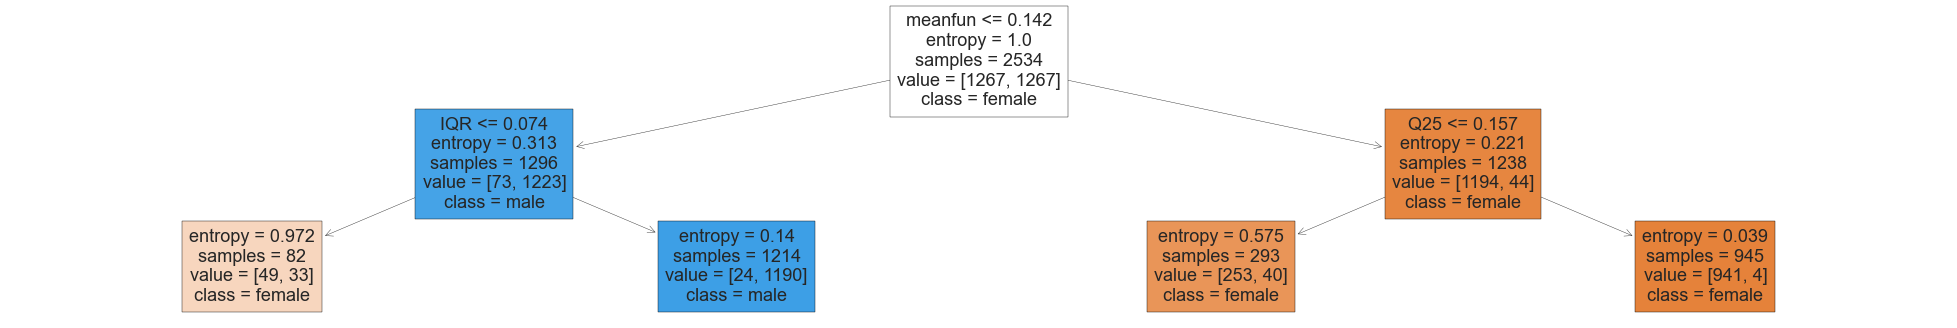

In [6]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(25, 4))
ax = plot_tree(dt, class_names=list(dt.classes_), feature_names=list(X_train.columns), filled=True, impurity=True, proportion=False)

print(f"1. {[X.columns[i] for i in dt.tree_.feature[dt.tree_.feature > 0]]} <- признаки, которые используются при построении дерева")

########## мини блок для вывода ответа на п.2
leaf_indices = np.where(dt.tree_.children_left == -1)[0]
predicted_classes = np.argmax(dt.tree_.value[leaf_indices], axis=2).flatten()
dict_of_classes_with_count = dict(zip(*np.unique(predicted_classes, return_counts=True)))
dict_with_y_train_classes = dict(enumerate(np.unique(y_train)))
final_dict = {dict_with_y_train_classes[k]: v for k, v in dict_of_classes_with_count.items()}

print(f"2. {leaf_indices} <-- номера листьев\n   {predicted_classes} <-- предсказанные классы\n   {dict_of_classes_with_count} <-- словарь с подсчётом количества листьев определённого класса\n   {dict_with_y_train_classes} <-- словарь с классами y_train")
print(f"\n   {final_dict} <-- итоговый словарь для ответа на п.2\n")
##########

print(f"3. {round(accuracy_score(y_test, dt.predict(X_test)), 3)} <- accuracy на тестовой выборке")

plt.show()

[↑ contents](#contents)

## Обучение <span style='color:lightgreen'>DecisionTreeClassifier</span> с параметрами: <a id='ex_7_3'></a> 
<span style='color:orange'>criterion</span>=<span style='color:yellow'>'entropy'</span>, <span style='color:orange'>max_depth</span>=<span style='color:blue'>None</span>, <span style='color:orange'>random_state</span>=<span style='color:blue'>0</span>

Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра `random_state` возьмите 0.

Обучите модель на тренировочной выборке.
1. Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода `get_depth()`.
2. Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода `get_n_leaves()`.
3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики `accuracy` на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

12 <-- глубина полученного дерева
54 <-- количество листьев
1.0 <-- accuracy на трейне
0.973 <-- accuracy на тесте


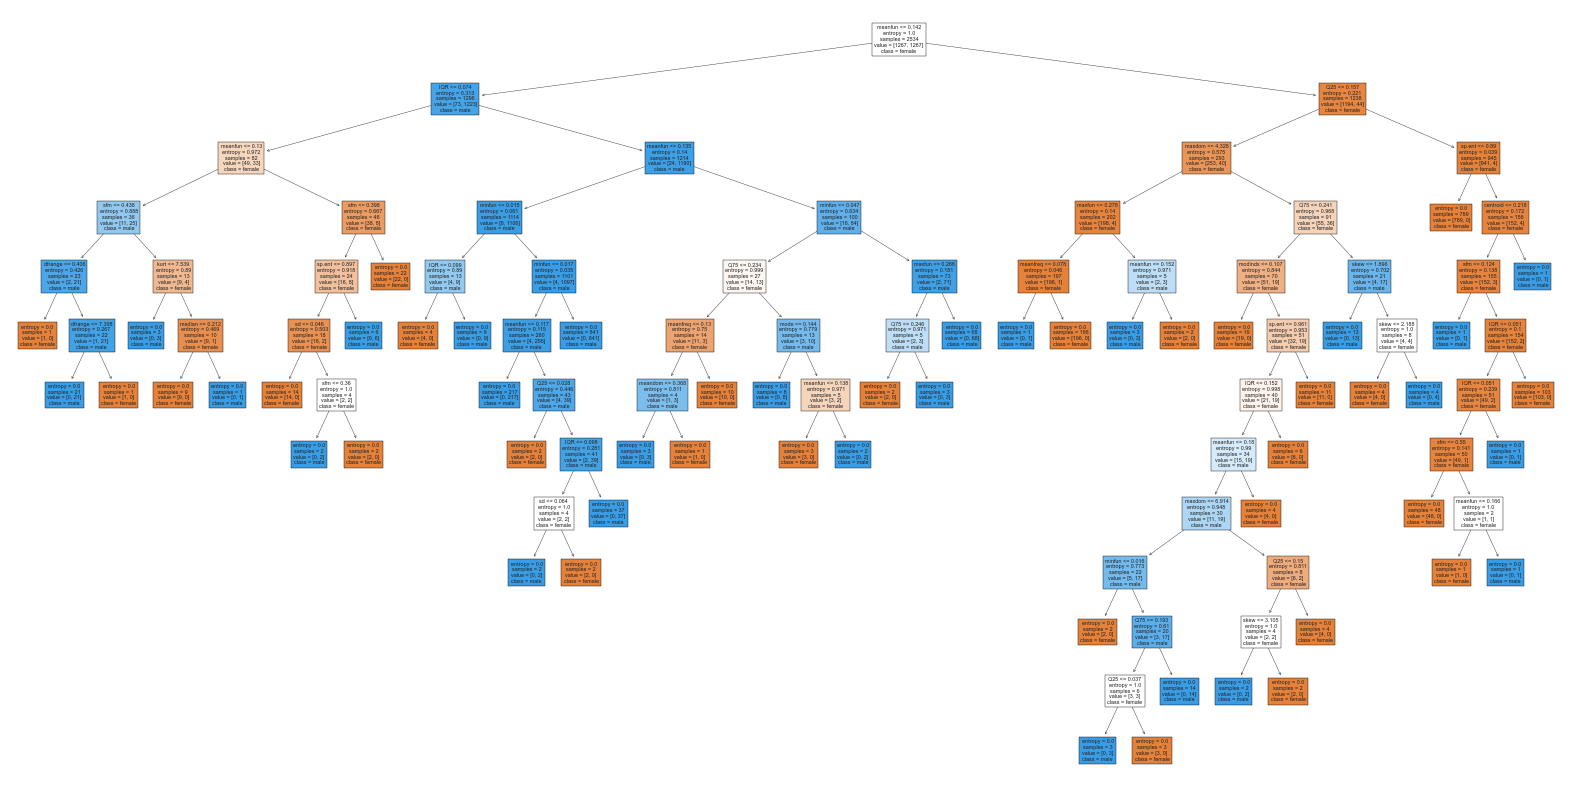

In [7]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)

print(f"{dt.get_depth()} <-- глубина полученного дерева")
print(f"{dt.get_n_leaves()} <-- количество листьев")
print(f"{accuracy_score(y_train, dt.predict(X_train))} <-- accuracy на трейне\n{round(accuracy_score(y_test, dt.predict(X_test)), 3)} <-- accuracy на тесте")

fig, ax = plt.subplots(figsize=(20, 10))
ax = plot_tree(dt, class_names=list(dt.classes_), feature_names=list(X_train.columns), filled=True, impurity=True, proportion=False)
plt.show()

[↑ contents](#contents)

## Обучение Обучение <span style='color:lightgreen'>DecisionTreeClassifier</span> через <span style='color:lightgreen'>GridSearchCV</span><a id='ex_7_4'></a>

Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (`Grid SearchCV`). 

С помощью `Grid SearchCV` из модуля `model_selection` библиотеки `sklearn` переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр `random_state` для дерева решений установите равным `0`. В качестве метрики качества (параметр `scoring`) используйте `accuracy`.

1. Какой критерий информативности использует наилучшая модель?
2. Чему равна оптимальная максимальная глубина?
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?
4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

Лучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
0.996 <-- accuracy на трейне
0.97 <-- accuracy на тесте


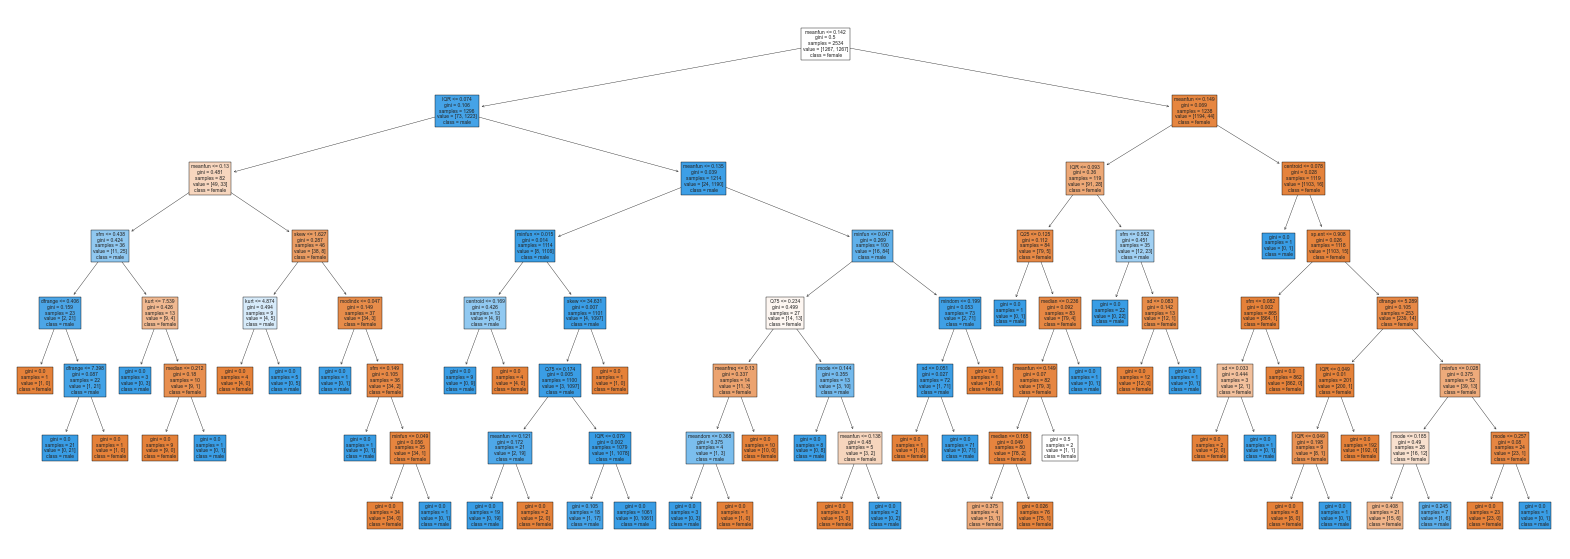

In [8]:
dt = DecisionTreeClassifier(random_state=0)

# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=StratifiedKFold(n_splits=5),
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f"{round(accuracy_score(y_train, grid_search.predict(X_train)), 3)} <-- accuracy на трейне\n{round(accuracy_score(y_test, grid_search.predict(X_test)), 3)} <-- accuracy на тесте")

fig, ax = plt.subplots(figsize=(20, 7))
ax = plot_tree(grid_search.best_estimator_, class_names=list(grid_search.best_estimator_.classes_), feature_names=list(X_train.columns), filled=True, impurity=True, proportion=False)
plt.show()

[↑ contents](#contents)

## Важность признаков обучения<a id='ex_7_5'></a>

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.
Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений:

Топ 3 признака для стройки дерева: ['meanfun', 'IQR', 'sfm']


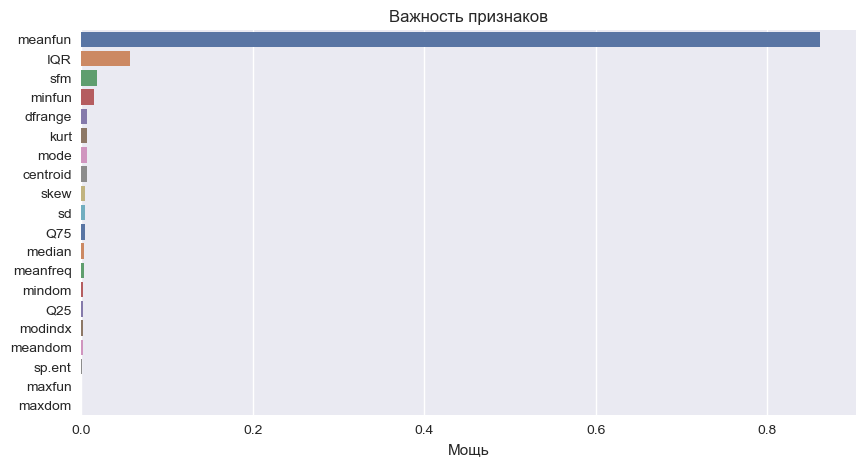

In [9]:
df_for_this_cell = pd.DataFrame([grid_search.best_estimator_.feature_names_in_, grid_search.best_estimator_.feature_importances_]).T.sort_values(by=1, ascending=False)

print(f"Топ 3 признака для стройки дерева: {df_for_this_cell.head(3)[0].to_list()}")

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y=df_for_this_cell[0], x=df_for_this_cell[1], palette='deep')
ax.set(title='Важность признаков', ylabel='', xlabel='Мощь')
plt.show()

[↑ contents](#contents)